# Football Player Price Prediction

Step 1: Import Libraries & Load Dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("football player.csv")

# Display basic info
print(df.shape)
print(df.info())
print(df.describe())


(461, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB
None


 Step 2: Distribution Plots (Univariate Analysis)

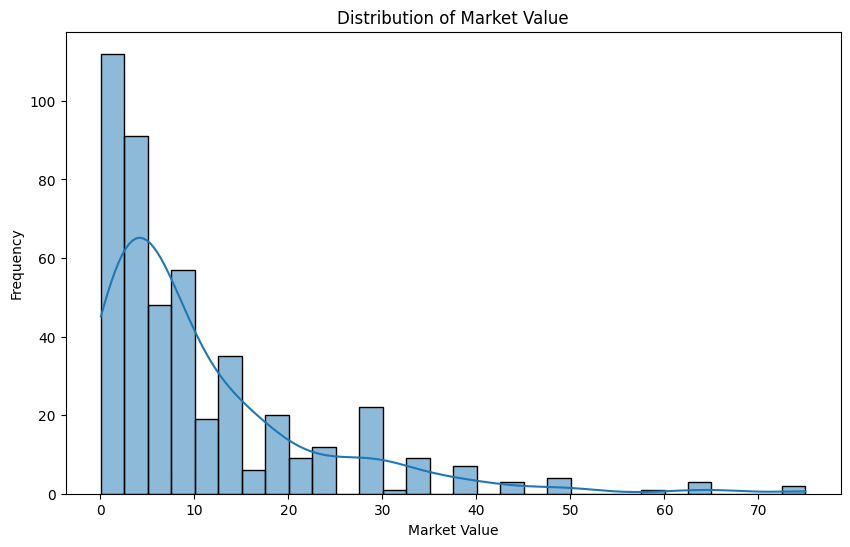

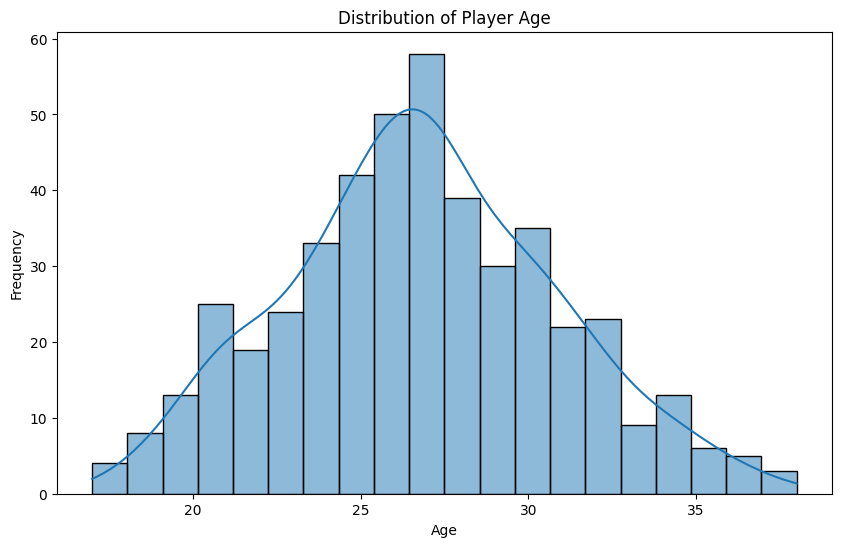

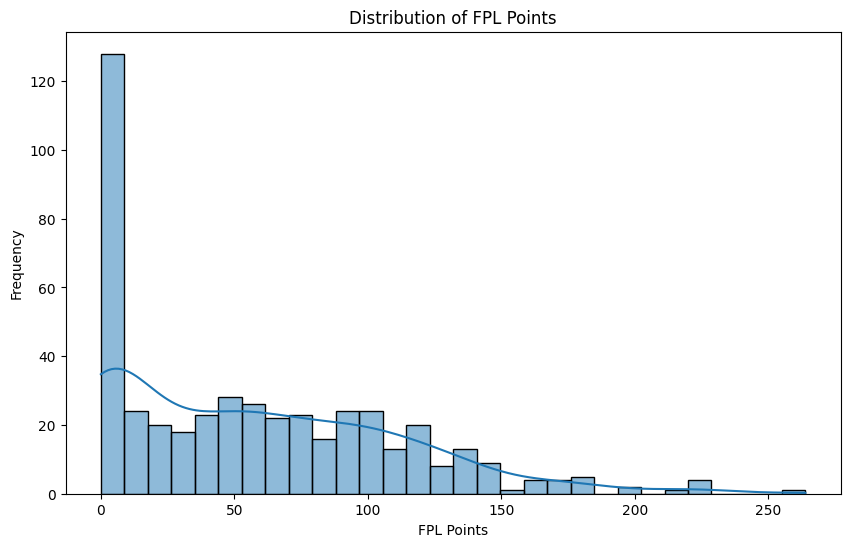

In [3]:
# Market Value distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['market_value'], bins=30, kde=True)
plt.title("Distribution of Market Value")
plt.xlabel("Market Value")
plt.ylabel("Frequency")
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Player Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# FPL Points distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['fpl_points'], bins=30, kde=True)
plt.title("Distribution of FPL Points")
plt.xlabel("FPL Points")
plt.ylabel("Frequency")
plt.show()

Step 3: Box Plots (Market Value by Categorical Features)

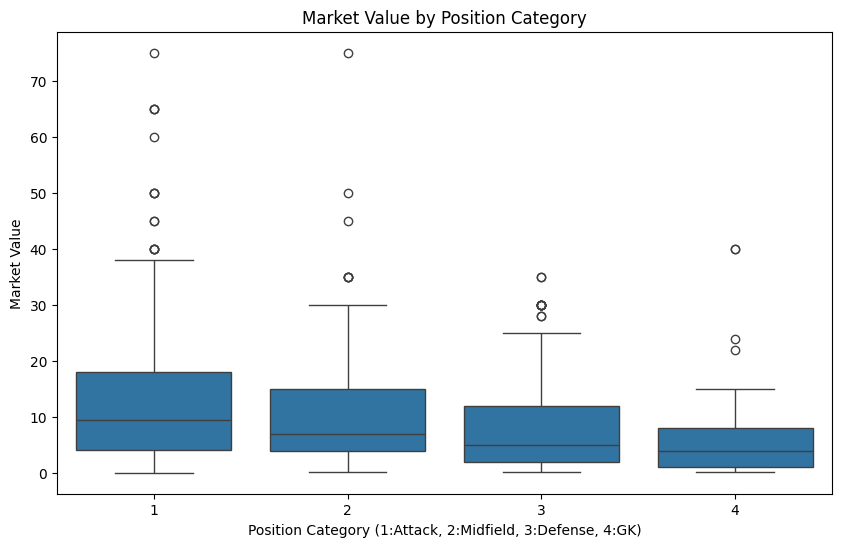

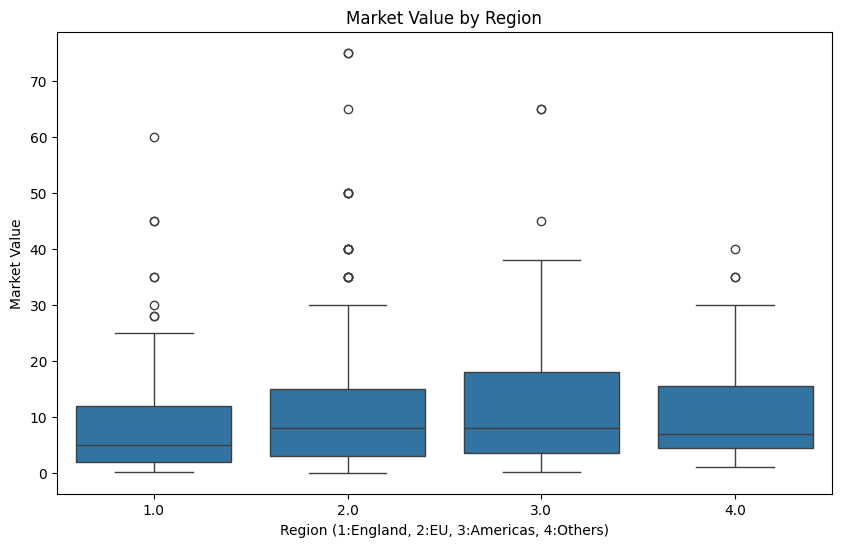

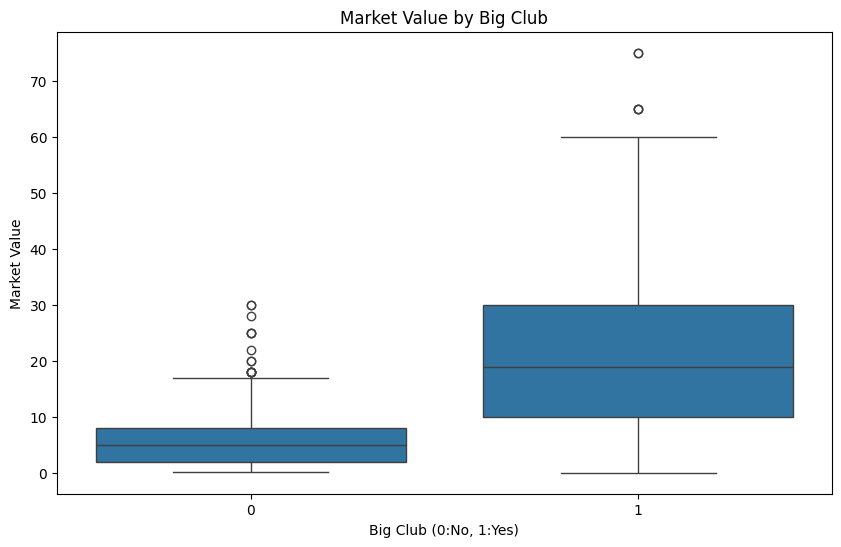

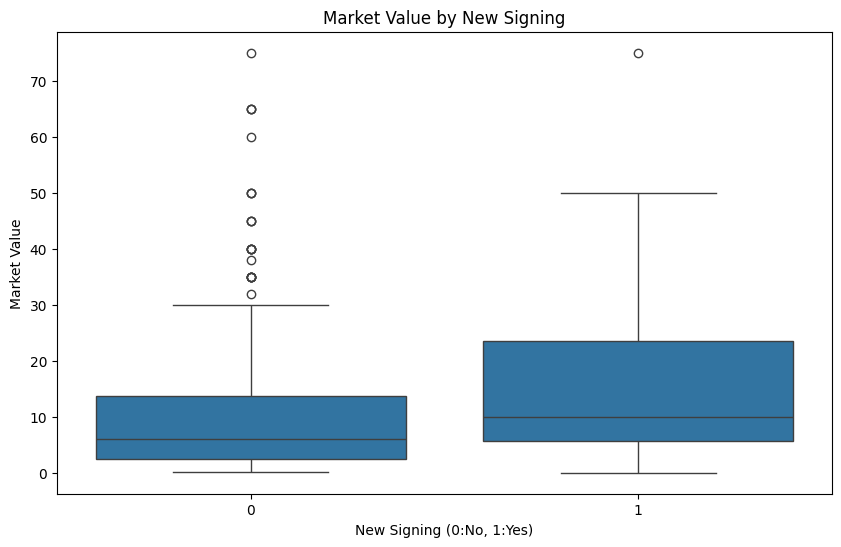

In [4]:
# Market Value by Position Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='position_cat', y='market_value', data=df)
plt.title("Market Value by Position Category")
plt.xlabel("Position Category (1:Attack, 2:Midfield, 3:Defense, 4:GK)")
plt.ylabel("Market Value")
plt.show()

# Market Value by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='market_value', data=df)
plt.title("Market Value by Region")
plt.xlabel("Region (1:England, 2:EU, 3:Americas, 4:Others)")
plt.ylabel("Market Value")
plt.show()

# Market Value by Big Club
plt.figure(figsize=(10, 6))
sns.boxplot(x='big_club', y='market_value', data=df)
plt.title("Market Value by Big Club")
plt.xlabel("Big Club (0:No, 1:Yes)")
plt.ylabel("Market Value")
plt.show()

# Market Value by New Signing
plt.figure(figsize=(10, 6))
sns.boxplot(x='new_signing', y='market_value', data=df)
plt.title("Market Value by New Signing")
plt.xlabel("New Signing (0:No, 1:Yes)")
plt.ylabel("Market Value")
plt.show()

Step 4: Count Plots (Frequency of Categorical Features)

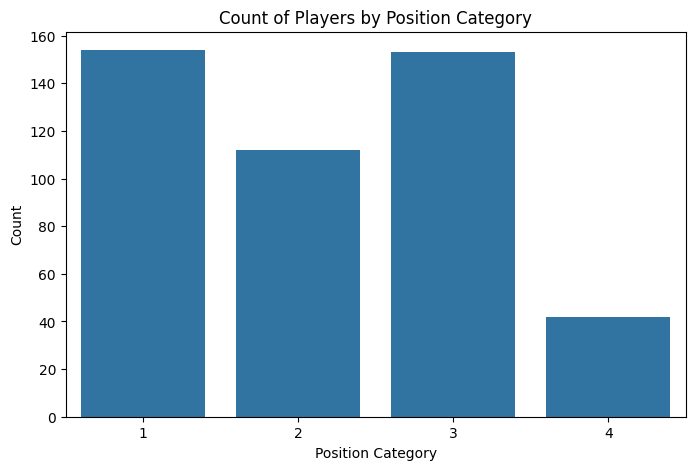

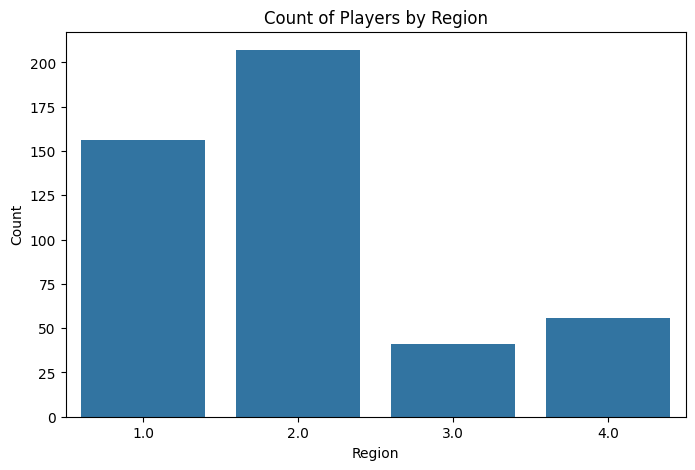

In [5]:
# Position Category
plt.figure(figsize=(8, 5))
sns.countplot(x='position_cat', data=df)
plt.title("Count of Players by Position Category")
plt.xlabel("Position Category")
plt.ylabel("Count")
plt.show()

# Region
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df)
plt.title("Count of Players by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Step 5: Correlation Heatmap

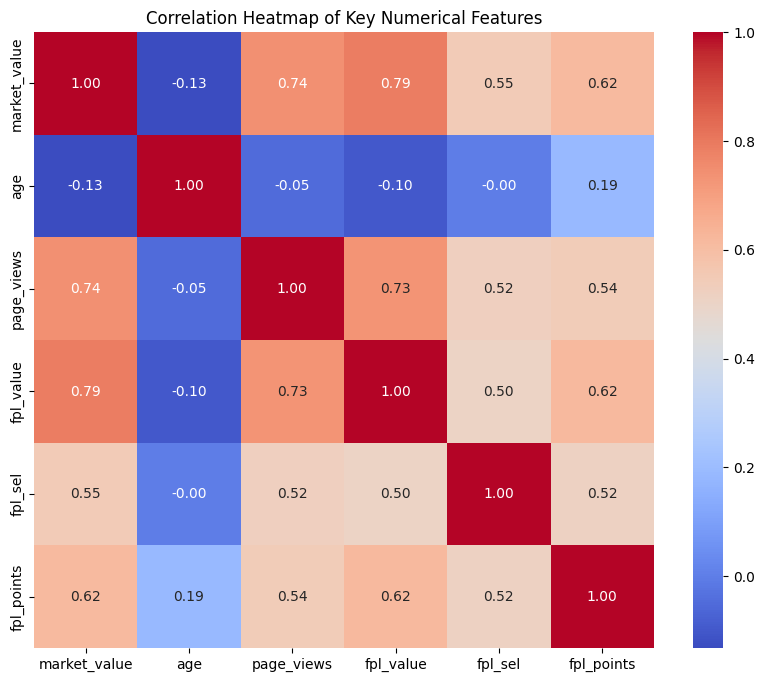

In [6]:
# Clean 'fpl_sel' by removing '%' and converting to float
if df['fpl_sel'].dtype == object:
    df['fpl_sel'] = df['fpl_sel'].str.replace('%', '', regex=False).astype(float)

# Select relevant numerical columns for correlation
num_cols = ['market_value', 'age', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points']

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Key Numerical Features")
plt.show()

Step 6: Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Check for missing values
print("Missing values before drop:\n", df.isnull().sum())

# Clean fpl_sel ONLY if it is still string
if df['fpl_sel'].dtype == 'object':
    df['fpl_sel'] = df['fpl_sel'].str.replace('%', '', regex=False).astype(float)

# Fill missing value in region
df['region'] = df['region'].fillna(df['region'].mode()[0])

# One-hot encode selected categorical columns
categorical_cols = ['club', 'position', 'new_foreign']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define X and y
X = df.drop(columns=['market_value'])
y = df['market_value']

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values before drop:
 club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64
X_train shape: (368, 43)
X_test shape: (93, 43)
y_train shape: (368,)
y_test shape: (93,)


Step 7: Train All Regression Models

In [22]:
# === 1. Import All Required Regression Models & Metrics ===
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np
import pandas as pd

# === 2. Define a Dictionary of Models ===
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNN Regression": KNeighborsRegressor(),
    "Support Vector Regression": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# === 3. Train and Evaluate Each Model ===
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2)
    })

    # Print individual results
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.2f}")
    print(f"RMSE    : {rmse:.2f}")

# === 4. Display All Results in a DataFrame ===
results_df = pd.DataFrame(results)
print("\n\n===== Model Evaluation Summary =====")
print(results_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True))


Linear Regression
R² Score: 0.8175
MAE     : 3.59
RMSE    : 4.70

Lasso Regression
R² Score: 0.8250
MAE     : 3.50
RMSE    : 4.60

Ridge Regression
R² Score: 0.8179
MAE     : 3.58
RMSE    : 4.69

KNN Regression
R² Score: 0.6872
MAE     : 4.57
RMSE    : 6.15

Support Vector Regression
R² Score: 0.3576
MAE     : 4.94
RMSE    : 8.82

Decision Tree
R² Score: 0.6865
MAE     : 4.20
RMSE    : 6.16

Random Forest
R² Score: 0.8458
MAE     : 3.01
RMSE    : 4.32

Gradient Boosting
R² Score: 0.8267
MAE     : 3.05
RMSE    : 4.58


===== Model Evaluation Summary =====
                       Model  R2 Score   MAE  RMSE
0              Random Forest    0.8458  3.01  4.32
1          Gradient Boosting    0.8267  3.05  4.58
2           Lasso Regression    0.8250  3.50  4.60
3           Ridge Regression    0.8179  3.58  4.69
4          Linear Regression    0.8175  3.59  4.70
5             KNN Regression    0.6872  4.57  6.15
6              Decision Tree    0.6865  4.20  6.16
7  Support Vector Regression  

Step 8: Tune the hyperparameters

In [23]:
# Import Libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define Hyperparameter Grids, (a) Random Forest:
from sklearn.ensemble import RandomForestRegressor

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Define Hyperparameter Grids, (a) Gradient Boosting:
from sklearn.ensemble import GradientBoostingRegressor

gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [24]:
#Run Grid Search, (a) Random Forest Grid Search:
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, scoring='r2')
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF R² Score on CV:", rf_grid.best_score_)

#Run Grid Search (b) Gradient Boosting Grid Search:
gbr = GradientBoostingRegressor(random_state=42)
gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, n_jobs=-1, scoring='r2')
gbr_grid.fit(X_train, y_train)

print("Best GBR Params:", gbr_grid.best_params_)
print("Best GBR R² Score on CV:", gbr_grid.best_score_)

Best RF Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF R² Score on CV: 0.7831995925862942
Best GBR Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best GBR R² Score on CV: 0.7913202908809426


In [25]:
 #Evaluate Tuned Models on Test Data
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"\n{name} Evaluation on Test Set:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.2f}")
    print(f"RMSE    : {rmse:.2f}")

# Evaluate best models
evaluate_model(rf_grid.best_estimator_, X_test, y_test, "Tuned Random Forest")
evaluate_model(gbr_grid.best_estimator_, X_test, y_test, "Tuned Gradient Boosting")


Tuned Random Forest Evaluation on Test Set:
R² Score: 0.8621
MAE     : 2.95
RMSE    : 4.09

Tuned Gradient Boosting Evaluation on Test Set:
R² Score: 0.7849
MAE     : 3.19
RMSE    : 5.10


In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define parameter distributions for Random Forest
rf_random_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] 
}


# Define parameter distributions for Gradient Boosting
gbr_random_params = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_random_params,
    n_iter=50,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# RandomizedSearchCV for Gradient Boosting
gbr_random_search = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=gbr_random_params,
    n_iter=50,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# Fit Random Forest
rf_random_search.fit(X_train, y_train)
print("\nBest Random Forest Parameters:", rf_random_search.best_params_)
print("Best Random Forest CV R² Score:", rf_random_search.best_score_)

# Fit Gradient Boosting
gbr_random_search.fit(X_train, y_train)
print("\nBest Gradient Boosting Parameters:", gbr_random_search.best_params_)
print("Best Gradient Boosting CV R² Score:", gbr_random_search.best_score_)

# Evaluate best models on test set
def evaluate_model(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"\n{name} Evaluation on Test Set:")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE     : {mae:.2f}")
    print(f"RMSE    : {rmse:.2f}")

# Final evaluation
evaluate_model(rf_random_search.best_estimator_, X_test, y_test, "Randomized Random Forest")
evaluate_model(gbr_random_search.best_estimator_, X_test, y_test, "Randomized Gradient Boosting")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best Random Forest CV R² Score: 0.7822776220976977
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Gradient Boosting Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 4, 'learning_rate': 0.1}
Best Gradient Boosting CV R² Score: 0.8021873632042242

Randomized Random Forest Evaluation on Test Set:
R² Score: 0.8641
MAE     : 2.94
RMSE    : 4.06

Randomized Gradient Boosting Evaluation on Test Set:
R² Score: 0.7767
MAE     : 3.36
RMSE    : 5.20
